<a href="https://colab.research.google.com/github/Manika6/Machine-Learning-Colab/blob/master/TensorFlow_Practice_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize
import Image



# IMPORTING DATA

In [0]:
input_data.read_data_sets('data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f4253e1c198>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f424ddbe940>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f424ddbec50>)

In [0]:
with open('data/train-images-idx3-ubyte.gz', 'rb') as f:
  train_images = extract_images(f)
with open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
  train_labels = extract_labels(f)

with open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
  test_images = extract_images(f)
with open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
  test_labels = extract_labels(f)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


# BUILDING THE MODEL

In [0]:
#for Ist convolution layer
filter_size1 = 5
num_filter1 = 32

#for 2nd convolution layer
filter_size1 = 5
num_filter1 = 36

#Size of the fully connected neural network
fc_size = 128  

input_size = 28
LEARNING_RATE = 0.001

In [0]:
def new_weights(shape):
  return tf.Variable(tf.random_normal(shape))

In [0]:
def new_baises(length):
  return tf.Variable(tf.constant(0.05, shape = length))

In [0]:
def conv_layer(input , filter_size, num_filter,nameLayer):
  
  layer = tf.layers.conv2d(inputs=input, filters=num_filter,
      kernel_size=[filter_size, filter_size],
      padding="same",
      activation = tf.nn.relu, name = nameLayer )  
  
  
  pool = tf.layers.max_pooling2d(inputs=layer, pool_size=[2, 2], strides=2)
  
  return pool, layer

In [0]:
def flatten_image(layer):
  
  layer_shape = layer.get_shape()
  num_features = np.array(layer_shape[1:4] , dtype=int ).prod()
  
  layer_flat = tf.reshape(layer,[-1,num_features])
  
  return layer_flat,num_features
  

In [0]:
def new_fc_layer(input , num_input, num_output):
  
  weights = new_weights(shape = [num_input,num_output])
  
  
  layer = tf.matmul(input, weights) 
  layer = tf.nn.relu(layer)
  
  return layer

In [0]:
inputTensor = tf.placeholder(tf.float32,[None,28,28,1])
outputTensor = tf.placeholder(tf.int32,[None])

In [0]:
y_true = tf.one_hot(outputTensor, 10)

In [0]:
layer1, im1 =  conv_layer(inputTensor , 5, 16, "conv1")

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


In [0]:
layer2, im2 = conv_layer(layer1 , 5, 32, "conv2")

In [0]:
flat_input, num_features = flatten_image(layer2)

In [0]:
layer3 = new_fc_layer(flat_input , num_features, fc_size)

In [0]:
layer4 = new_fc_layer(layer3 ,  fc_size ,10)

In [0]:
y_pred = tf.nn.softmax(layer4)

In [0]:
error_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=layer4, labels=y_true))

#tf.summary.histogram(“Error”, error_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
training = tf.train.AdamOptimizer(LEARNING_RATE).minimize(error_function)

In [0]:
correct_prediction = tf.equal(y_true,y_pred)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

#tf.summary.histogram(“Accuracy”, Accuracy)

In [0]:
session = tf.Session()
#train_writer = tf.summary.FileWriter( './logs/1/train ', session.graph)
session.run(tf.global_variables_initializer())

In [0]:
#merge = tf.summary.merge_all()

for i in range(0,60000,10000):
  #train_writer.add_summary(summary, counter)

  session.run(training,feed_dict = {inputTensor : train_images[i:i+10000] , outputTensor : train_labels[i:i+10000]} )

In [0]:
session.run(accuracy,feed_dict = {inputTensor : test_images , outputTensor : test_labels} )

0.82159

In [0]:
def getActivations(layer):
    units = layer.eval(session=session,feed_dict={inputTensor:test_images[500].reshape(1,28,28,1) ,outputTensor : test_labels[500].reshape(1)})
    plotNNFilter(units)

In [0]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    for i in range(0,filters):
        plt.subplot(7,6,i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

3


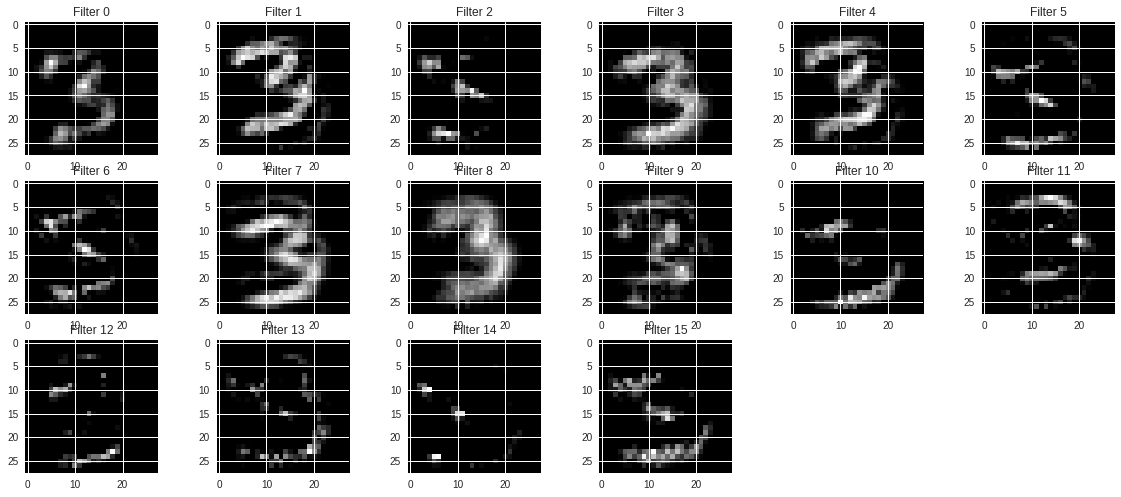

In [0]:
getActivations(im1)
print(test_labels[500])

3


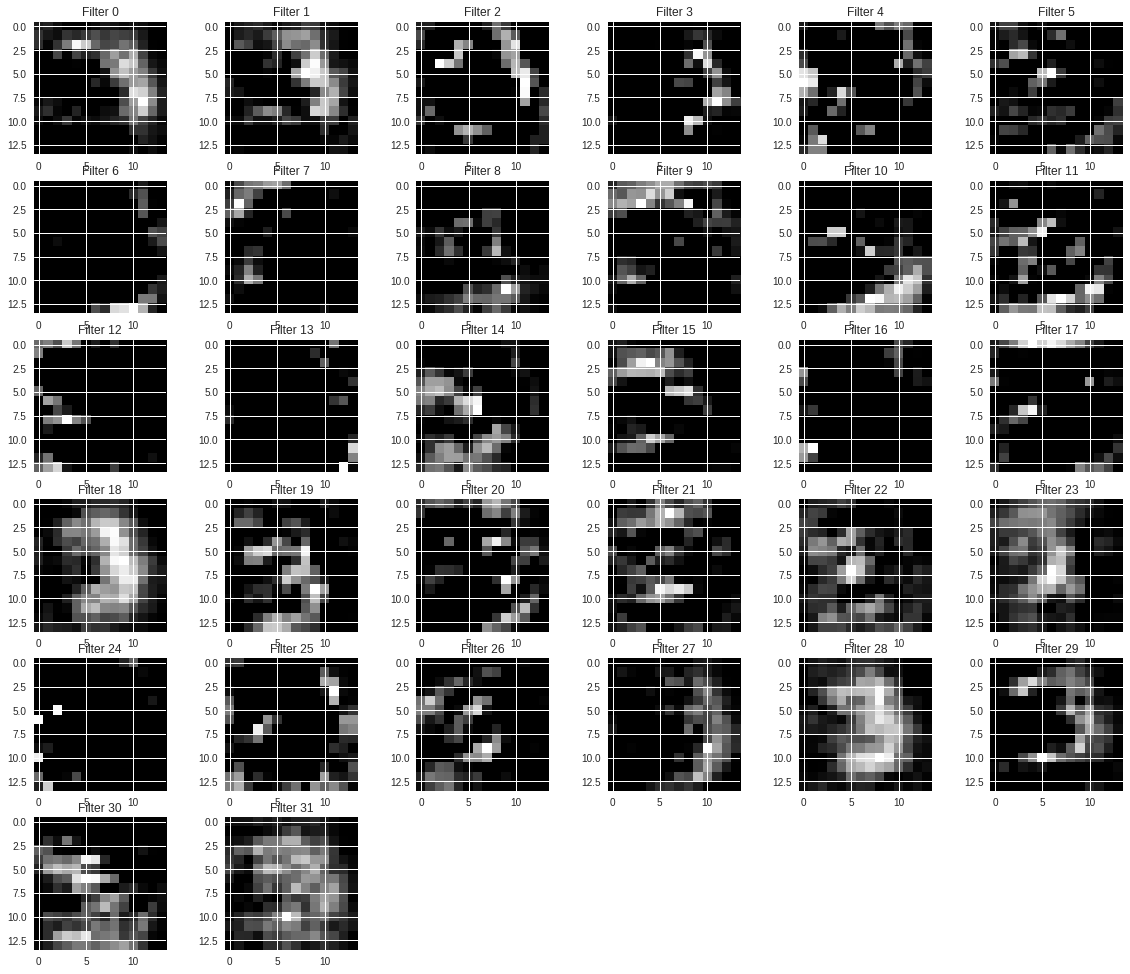

In [0]:
getActivations(im2)
print(test_labels[500])